# First maps

In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline

from iminuit import Minuit
from iminuit.cost import LeastSquares

from simulMap import get_RADEC2NSource, get_hist, plot_fit, fit_minuit, gauss

In [2]:
#resolution:
NSIDE = 64
NPIX = hp.nside2npix(NSIDE)
print("Number of pixels = {}".format(NPIX))

#sources:
NSource_px_th = int(1e6)
print("Total number of sources in the entire sky : {}".format(NSource_px_th*NPIX))
print("Theorical number of sources in one pixel : {}".format(NSource_px_th))

Number of pixels = 49152
Total number of sources in the entire sky : 49152000000
Theorical number of sources in one pixel : 1000000


## Poisson law

### From the theorical number of sources by pixels

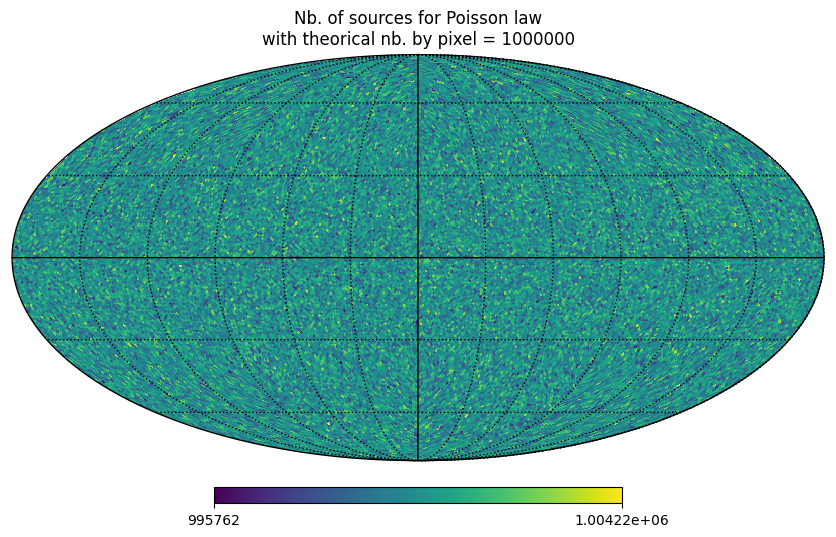

In [3]:
NSource_px = np.random.poisson(NSource_px_th, NPIX) #nb. aléatoire de sources dans chaque pixel
hp.mollview(NSource_px, title="Nb. of sources for Poisson law\nwith theorical nb. by pixel = {}".format(NSource_px_th))
hp.graticule()

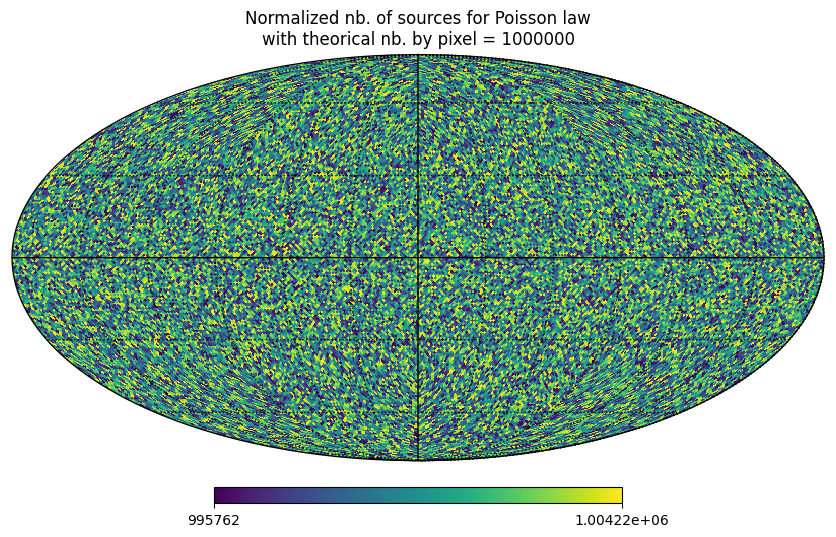

In [4]:
hp.mollview(NSource_px, norm = "hist", title="Normalized nb. of sources for Poisson law\nwith theorical nb. by pixel = {}".format(NSource_px_th),
           #min=0, max=1,
           )
hp.graticule()

#### Fitting the histogram

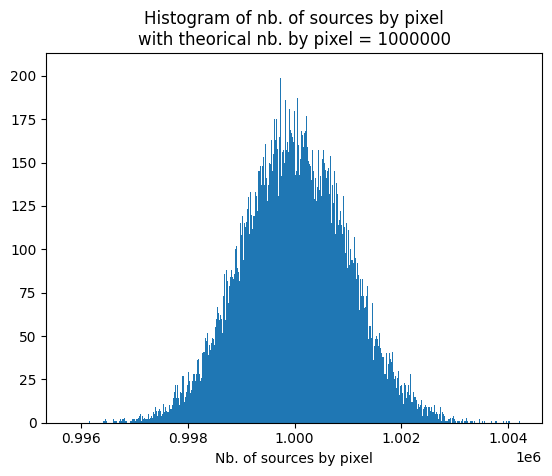

In [5]:
title = "Histogram of nb. of sources by pixel\nwith theorical nb. by pixel = {}".format(NSource_px_th)
var, bins = get_hist(NSource_px, bins=1000, title = title)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.397e+06 (χ²/ndof = 6416.4)│              Nfcn = 205              │
│ EDM = 1.01e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A     │ 415.522e3 │  0.021e3  │  -0.021e3  │  0.021e3   │         │         │       │
│ 1 │ mu    │999.99455e3│ 0.00006e3 │ -0.00006e3 │ 0.00006e3  │         │         │       │
│ 2 │ sigma │  999.26   │   0.06    │   -0.06    │    0.06    │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           A           │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │    -21    │    21     │   -0.06   │   0.06    │   -0.06   │   0.06    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───────┬─────────────────────────┐
│       │       A      mu   sigma │
├───────┼─────────────────────────┤
│     A │     449 -0.0026  0.7198 │
│    mu │ -0.0026 0.00346 -0.0000 │
│ sigma │  0.7198 -0.0000 0.00346 │
└───────┴─────────────────────────┘

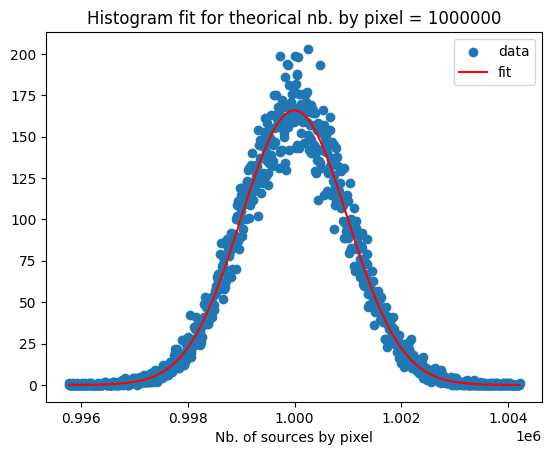

In [6]:
m = fit_minuit(bins, var, 0.1, gauss, (400, NSource_px_th, np.sqrt(NSource_px_th)), ("A", "mu", "sigma"),
              title="Histogram fit for theorical nb. by pixel = {}".format(NSource_px_th), xlabel="Nb. of sources by pixel")
m

### From RA & DEC

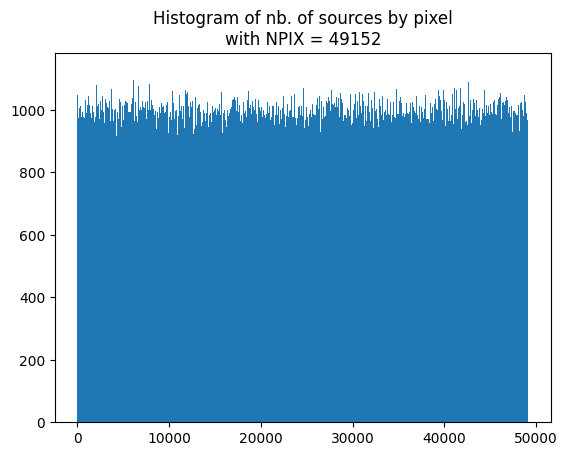

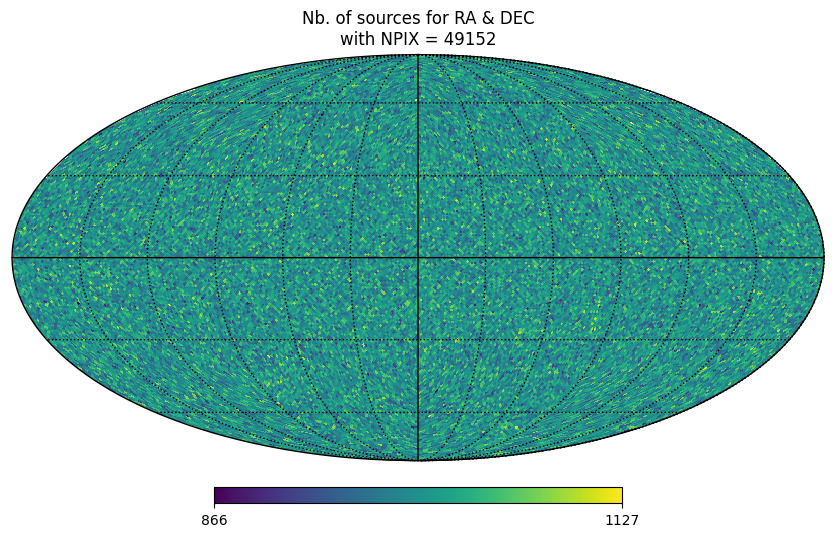

In [7]:
SCALE = 1000 #sinon, trop de points
NSource_px_RADEC, RA, DEC = get_RADEC2NSource(NSIDE, NSource_px_th/SCALE)
hp.mollview(NSource_px_RADEC, title="Nb. of sources for RA & DEC\nwith NPIX = {}".format(NPIX))
hp.graticule()

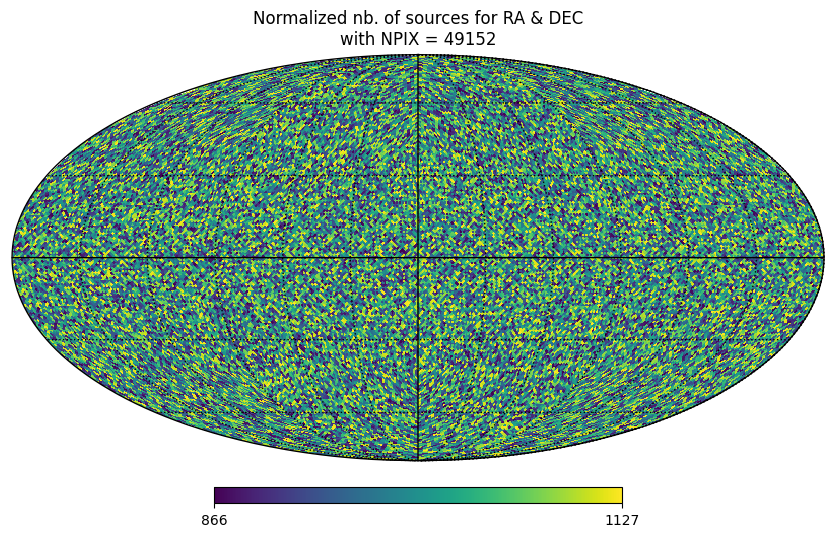

In [8]:
hp.mollview(NSource_px_RADEC, norm="hist", title="Normalized nb. of sources for RA & DEC\nwith NPIX = {}".format(NPIX))
hp.graticule()

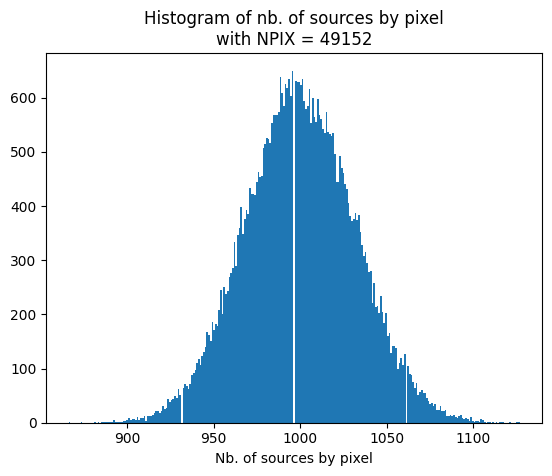

In [9]:
title = "Histogram of nb. of sources by pixel\nwith NPIX = {}".format(NPIX)
var, bins = get_hist(NSource_px_RADEC, bins=265, title=title)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.283e+07 (χ²/ndof = 163462.8)│              Nfcn = 203              │
│ EDM = 3.98e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A     │ 48.5848e3 │ 0.0013e3  │ -0.0013e3  │  0.0013e3  │         │         │       │
│ 1 │ mu    │ 999.7765  │  0.0010   │  -0.0010   │   0.0010   │         │         │       │
│ 2 │ sigma │  32.1412  │  0.0010   │  -0.0010   │   0.0010   │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           A           │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -1.3    │    1.3    │   -1e-3   │   1e-3    │   -1e-3   │   1e-3    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───────┬────────────────────────────┐
│       │        A       mu    sigma │
├───────┼────────────────────────────┤
│     A │     1.67   5.4e-6 721.4e-6 │
│    mu │   5.4e-6 9.82e-07     0e-6 │
│ sigma │ 721.4e-6     0e-6 9.55e-07 │
└───────┴────────────────────────────┘

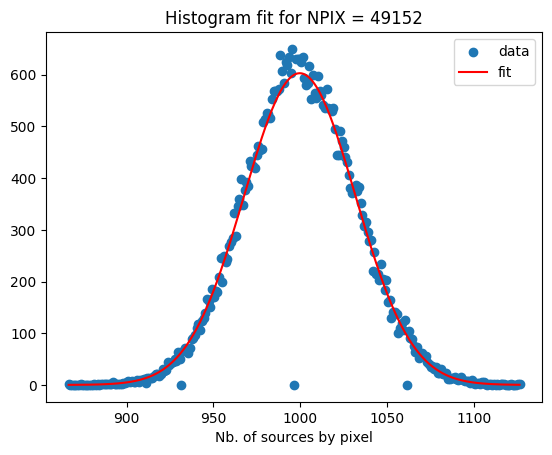

In [10]:
m = fit_minuit(bins, var, 0.1, gauss, (200, NSource_px_th/SCALE, np.sqrt(NSource_px_th/SCALE)), ("A", "mu", "sigma"),
              title="Histogram fit for NPIX = {}".format(NPIX), xlabel="Nb. of sources by pixel")
m

## Masked data

In [22]:
NSource_px_masked = hp.ma(NSource_px)
hp.mollview(NSource_px_masked.filled(), title="Nb. of sources for Poisson law\nwith mask")
hp.graticule()
NSource_px_masked.mask

TypeError: Cannot convert fill_value -1.6375e+30 to dtype int64